### This notebook aims to get a deeper understanding of the dataset
Specifically, to explore the general facts about the sample population and to find possible curiosities

In [102]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import colors as mcolors

### Age extraction

In [103]:
users = pd.read_csv('Data/userlist_filt.csv')
ages = users.groupby(['age','gender']).size().reset_index(name='count')
repeated_indices = ages.index.repeat(ages['count'])
ages_expanded = ages.loc[repeated_indices, ['age', 'gender']].reset_index(drop=True)
ages['age'] = ages['age'].astype('int64')
ages = ages.groupby('age').sum().reset_index()

Plotting age distribution

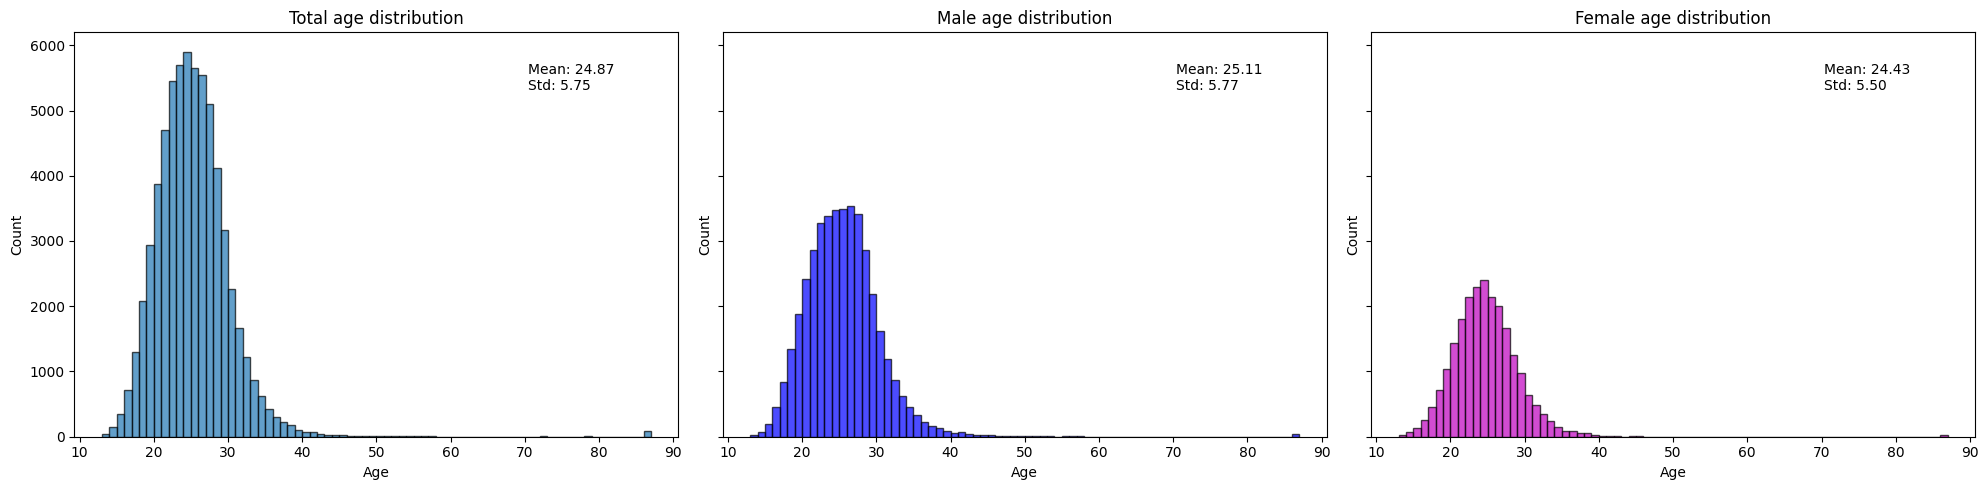

In [104]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex='col', sharey='row', figsize=(20, 5))
ax1.hist(ages_expanded['age'], bins=range(min(ages['age']), max(ages['age'])), edgecolor='black', alpha=0.7)
ax1.annotate(f'Mean: {ages_expanded["age"].mean():.2f}\nStd: {ages_expanded["age"].std():.2f}', xy=(max(ages['age'])*0.8,max(ages['count'])*0.9))
ax1.set_title('Total age distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

male = ages_expanded[ages_expanded['gender']=="Male"]
ax2.hist(male['age'], bins=range(min(ages['age']), max(ages['age'])), edgecolor='black', alpha=0.7, color='b')
ax2.annotate(f'Mean: {male["age"].mean():.2f}\nStd: {male["age"].std():.2f}', xy=(max(ages['age'])*0.8,max(ages['count'])*0.9))
ax2.set_title('Male age distribution')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

female = ages_expanded[ages_expanded['gender']=="Female"]
ax3.hist(female["age"], bins=range(min(ages['age']), max(ages['age'])), edgecolor='black', alpha=0.7,color='m')
ax3.annotate(f'Mean: {female["age"].mean():.2f}\nStd: {female["age"].std():.2f}', xy=(max(ages['age'])*0.8,max(ages['count'])*0.9))
ax3.set_title('Female age distribution')
ax3.set_xlabel('Age')
ax3.set_ylabel('Count')
plt.tight_layout()
plt.show()

The results above allow us to see that the reported ages of people in the anime community seem to be normally distributed with a mean around 25 years.

### Country loading

In [105]:
countries = users.groupby('country').size().reset_index(name='count')
countries.rename(columns={'country': 'SOVEREIGNT', 'count': 'User_Count'}, inplace=True)

Plotting user counts by country with choropleth graph

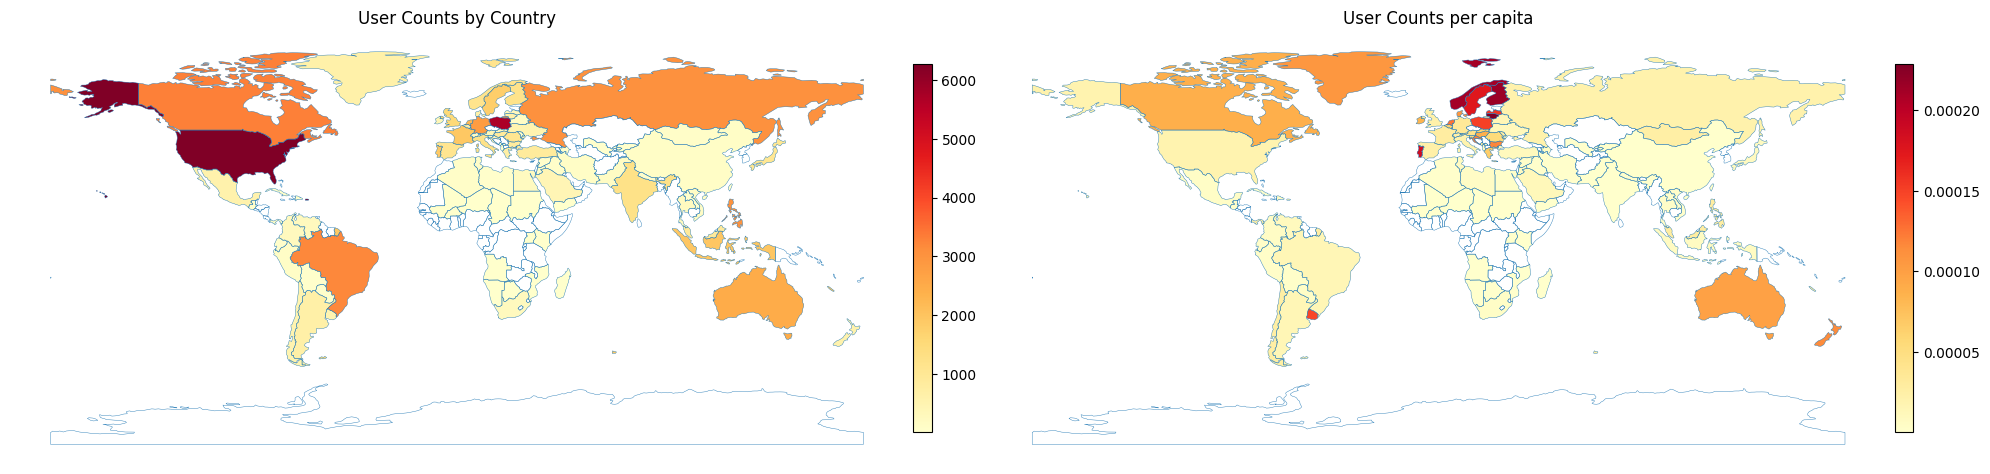

In [106]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 15))

world = gpd.read_file('Data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty.shp')
world = world.merge(countries, how='left', on='SOVEREIGNT')
world.boundary.plot(ax=ax1, linewidth=0.3)
choropleth = world.plot(column='User_Count', ax=ax1, legend=False, cmap='YlOrRd')

world_adjusted  = world.copy()
world_adjusted['User_Count'] = world_adjusted['User_Count'] / world_adjusted['POP_EST']
world_adjusted.boundary.plot(ax=ax2, linewidth=0.3)
choropleth_adjusted = world_adjusted.plot(column='User_Count', ax=ax2, legend=False, cmap='YlOrRd')
# Create colorbar
sm = plt.cm.ScalarMappable(cmap='YlOrRd',norm=mcolors.Normalize(vmin=world['User_Count'].min(), vmax=world['User_Count'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', fraction=0.02, pad=0.01)

sm2 = plt.cm.ScalarMappable(cmap='YlOrRd',norm=mcolors.Normalize(vmin=world_adjusted['User_Count'].min(), vmax=world_adjusted['User_Count'].max()))
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, orientation='vertical', fraction=0.02, pad=0.01)
ax1.axis('off')
ax1.set_title('User Counts by Country')
ax2.axis('off')
ax2.set_title('User Counts per capita')
plt.tight_layout()
plt.show()

The choropleth graph shows an interesting picture. It appears that the largest demographic of this website is in the United States, but the second-largest is in Poland.

Even after adjusting for the population, Poland still appears to be among the highest.